# 6.5 Unsupervised Machine Learning: Clustering

## Table of Contents
1. Importing Libraries  
2. Importing Dataframe  
3. Data Cleaning, Standardize Data  
4. The Elbow Technique  
5. K-Means Clustering  
6. Visualizations  
7. Observations of the Results  
8. Descriptive Statistics

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler 

In [2]:
# Ensure that the graphs create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

### 2. Importing Dataframe

In [3]:
# Assign path
path = 'C:/Users/clany/OneDrive/Documents/CareerFoundry/Chap 6_Sourcing Open Data/World Happiness Analysis'

In [4]:
# Import Dataframe 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'World_Happiness_6_3.csv'), index_col = False )

### 3. Data Cleaning and Standardize Data

In [5]:
df.shape

(1367, 13)

In [6]:
df.head()

,Country,Region,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Corruption Perception,Year,Overall Rank,Covid Status Year,Happiness Barometer
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015.0,1.0,Before Covid,Happy Nation
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015.0,2.0,Before Covid,Happy Nation
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015.0,3.0,Before Covid,Happy Nation
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015.0,4.0,Before Covid,Happy Nation
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015.0,5.0,Before Covid,Happy Nation


In [7]:
df.isnull().sum()

Country                  0
Region                   0
Happiness Score          0
GDP per Capita           0
Social Support           0
Health                   1
Freedom                  0
Generosity               0
Corruption Perception    0
Year                     0
Overall Rank             0
Covid Status Year        0
Happiness Barometer      0
dtype: int64

In [8]:
# Dropping non-numerical columns to be able to run the k-means clustering
# Create a subset to hold the remaining numerical columns

df_sub = df.drop(columns = ['Country', 'Region', 'Year', 'Covid Status Year', 'Happiness Barometer'])

In [9]:
df_sub.head()

,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Corruption Perception,Overall Rank
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1.0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,3.0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,4.0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,5.0


In [10]:
# Dropping the row with missing value, otherwise we can't use the following model
df_sub2 = df_sub.dropna(axis=0)

In [12]:
df_sub2.isnull().sum()

Happiness Score          0
GDP per Capita           0
Social Support           0
Health                   0
Freedom                  0
Generosity               0
Corruption Perception    0
Overall Rank             0
dtype: int64

In [13]:
#Define a list containing column names to be scaled data subset
column3 = ['Happiness Score', 'GDP per Capita', 'Social Support', 'Health', 'Freedom', 'Generosity', 'Corruption Perception', 'Overall Rank']

In [14]:
#Defining Scaler to standardize the data by centering it (subtracting the mean) 
#and scaling it (dividing by the standard deviation).

scaler = StandardScaler()

In [15]:
#Scaling data subset 
df_scaled = pd.DataFrame(scaler.fit_transform(df_sub2), columns=column3) 

In [16]:
df_scaled.head()

,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Corruption Perception,Overall Rank
0,1.919388,0.831358,0.919305,1.458558,1.370340,0.886778,2.555175,-1.714075
1,1.896129,0.623749,1.078538,1.484719,1.135541,2.118791,0.081135,-1.691392
2,1.865712,0.674798,0.952740,1.185977,1.267041,1.280701,3.122196,-1.668708
3,1.861239,0.969095,0.863247,1.229115,1.396882,1.330151,2.068509,-1.646025
4,1.776252,0.676583,0.838057,1.312452,1.162339,2.311381,1.753310,-1.623341


In [17]:
df_sub2.head()

,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Corruption Perception,Overall Rank
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1.0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,3.0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,4.0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,5.0


### 4. The Elbow Technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\clany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\clany\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\clany\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\clany\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\clany\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: char

[-10928.0,
 -6859.3972815999605,
 -5447.433775907311,
 -4884.172752921875,
 -4452.731491507184,
 -4163.916880983233,
 -3937.143770172225,
 -3756.5353649372537,
 -3588.127864489351]

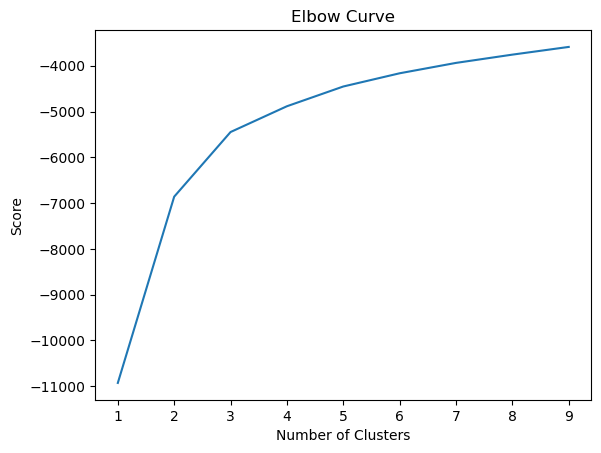

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Number of Clusters to use in the k-means algorithm
The elbow, marked as the breaking point of the curve, is where the curve starts leveling off. In this scenario, we notice the curve rises sharply to 3, then experiences another increase up till 5, before it continues smoothly to 9. This observation leads me to conclude that the most suitable number of clusters is 5.

### 5. K-means Clustering

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5)

In [22]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

C:\Users\clany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\clany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=5)

In [23]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\clany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\clany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [24]:
df_scaled.head()

,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Corruption Perception,Overall Rank,clusters
0,1.919388,0.831358,0.919305,1.458558,1.370340,0.886778,2.555175,-1.714075,2
1,1.896129,0.623749,1.078538,1.484719,1.135541,2.118791,0.081135,-1.691392,2
2,1.865712,0.674798,0.952740,1.185977,1.267041,1.280701,3.122196,-1.668708,2
3,1.861239,0.969095,0.863247,1.229115,1.396882,1.330151,2.068509,-1.646025,2
4,1.776252,0.676583,0.838057,1.312452,1.162339,2.311381,1.753310,-1.623341,2


In [25]:
df_scaled['clusters'].value_counts()

clusters
4    409
1    346
0    265
2    189
3    157
Name: count, dtype: int64

### 6. Visualizations using Clustered Data

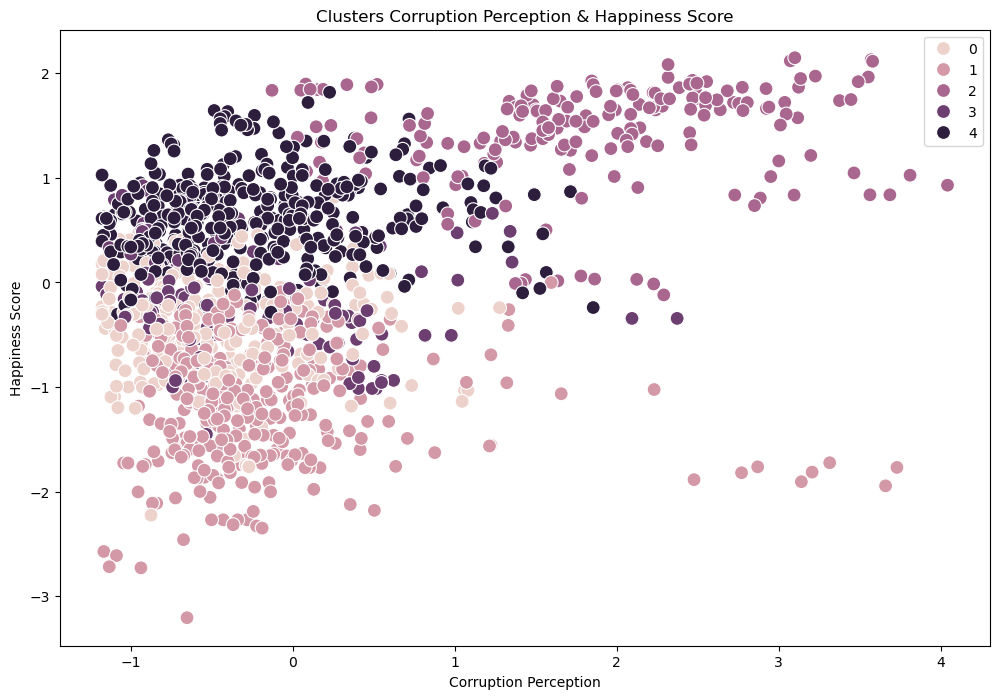

<Figure size 640x480 with 0 Axes>

In [26]:
# Plot the clusters for the "Happiness Score" and "Corruption Perception" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Corruption Perception'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Corruption Perception') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Clusters Corruption Perception & Happiness Score')
plt.show()
plt.savefig(os.path.join(path, 'Cluster_Happy_Corruption'),bbox_inches='tight', pad_inches=0.1)

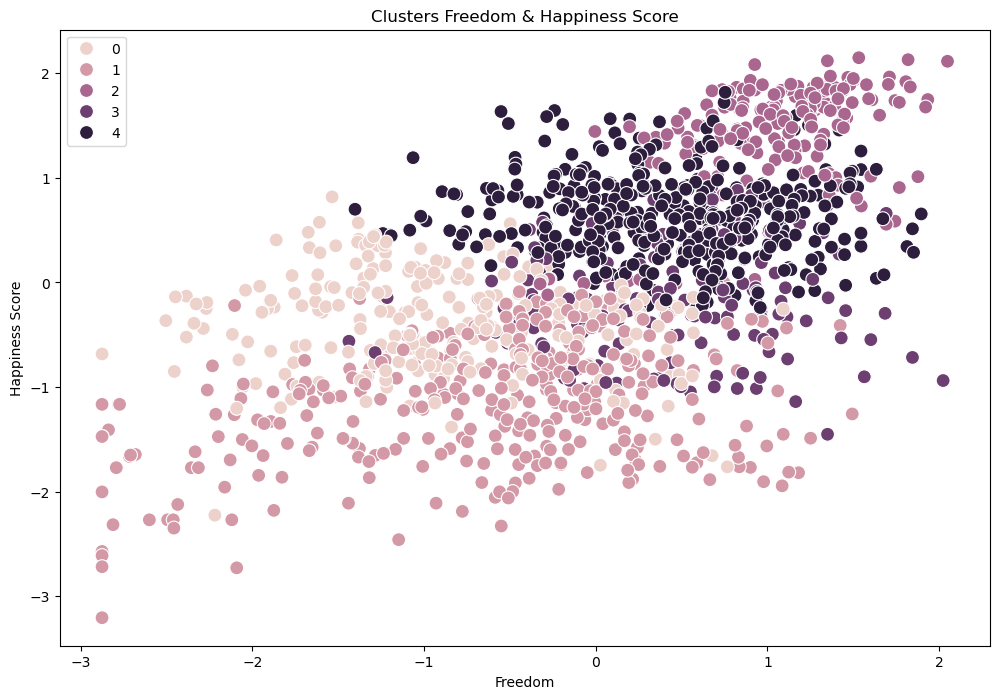

<Figure size 640x480 with 0 Axes>

In [27]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Freedom'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Clusters Freedom & Happiness Score')
plt.show()
plt.savefig(os.path.join(path, 'Cluster_Happiness_Freedom'),bbox_inches='tight', pad_inches=0.1)

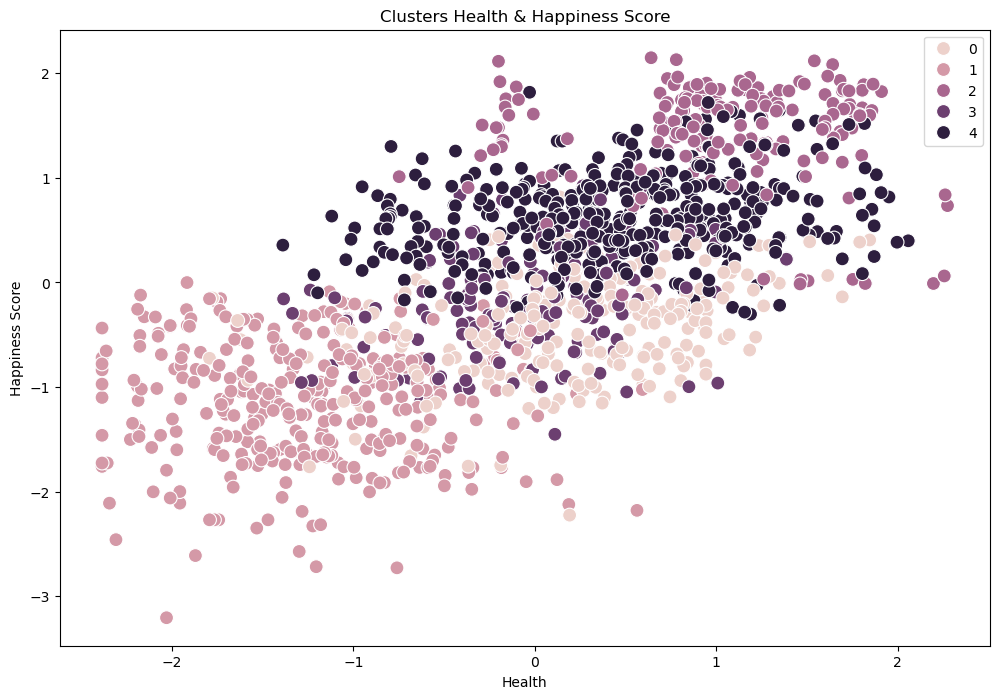

<Figure size 640x480 with 0 Axes>

In [28]:
# Plot the clusters for the "Happiness Score" and "Health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Health'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Health') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Clusters Health & Happiness Score')
plt.show()
plt.savefig(os.path.join(path, 'Cluster_Happiness_Healthy'),bbox_inches='tight', pad_inches=0.1)

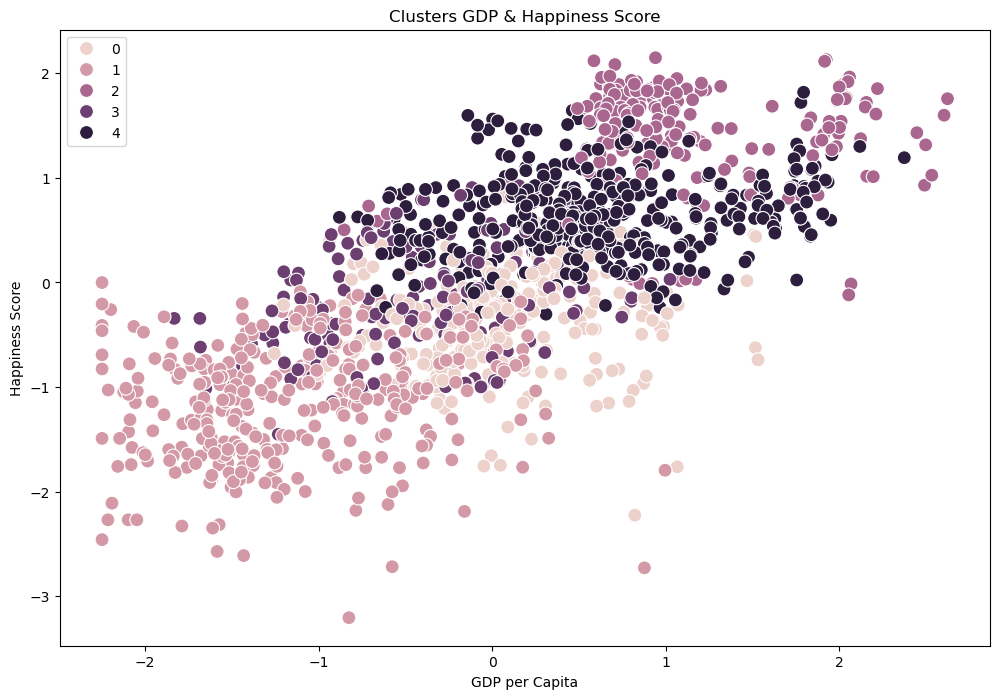

In [29]:
# Plot the clusters for the "Happiness Score" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['GDP per Capita'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Clusters GDP & Happiness Score')
plt.show()

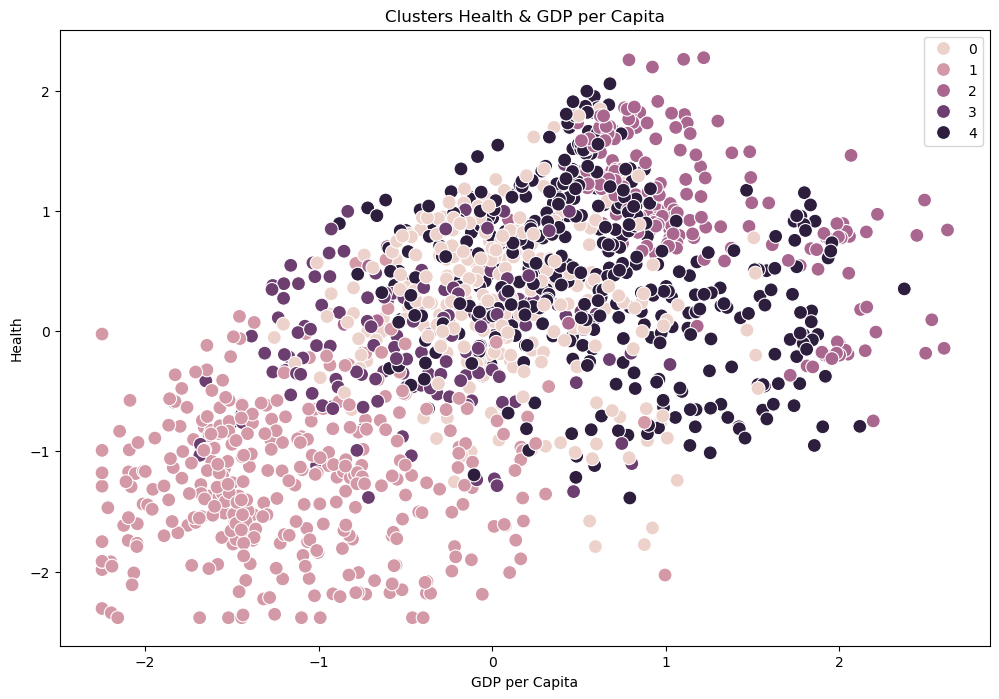

<Figure size 640x480 with 0 Axes>

In [30]:
# Plot the clusters for the "Health" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['GDP per Capita'], y=df_scaled['Health'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Health') # Label y-axis.
plt.title('Clusters Health & GDP per Capita')
plt.show()
plt.savefig(os.path.join(path, 'Cluster_Health_GDP_per_Capita'),bbox_inches='tight', pad_inches=0.1)

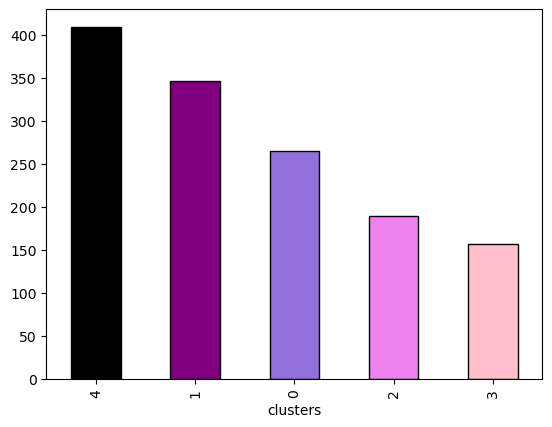

In [31]:
bar = df_scaled['clusters'].value_counts().plot.bar(color=['black', 'purple', 'mediumpurple', 'violet', 'pink'],edgecolor='black')

### 7. Observations of the Results

##### "Happiness Score" vs "Corruption Perception":   
Clusters #0, #1 and #4 show a strong correlation between unhappy countries and their corruption perception, whereas cluster #3 does not support this theory. As for the fifth cluster #2, it seems to have a lot of variances.   
##### "Happiness Score" vs "Freedom":  
As anticipated, the scatterplot results align with expectations: Clusters labeled as 0 and 3 in the legend indicate that moderately happy countries exhibit freedom scores ranging from 0 to 2. Cluster 2 illustrates that happier countries generally possess slightly higher freedom scores compared to less happy nations. The last cluster 1 highlights that unhappy countries have no correlation to freedom scores when compared to somewhat happy nations.
##### "Happiness Score" vs "Health":  
There seems to be a significant correlation between health and happiness scores, as the clusters coded 2 and 3 lie between 0 and 2. However, cluster 4 tends to range mainly between 0 and -1. As for cluster 1 which moves only under 0, it also has a lot of variances observed.    
##### "Happiness Score" vs "GDP per Capita"  
Based on the chart above it is clear that cluster groups 2 and 3 have the highest GDP per Capita as well as the highest happiness scores. Whilst cluster 1 demonstrates a low GDP per Capita as well as a low happiness score, cluster 4 moves between -1 and 1 on the scale of GDP with 0 happiness score.
##### "Health" vs "GDP per Capita"  
The clusters 2,3,4 show a correlation between GDP and Health, whereas cluster moves between 0 and -1 for both variables. Cluster 1, even with a lot of variances, lies definitely in the minus for both variables.

### 8. Descriptive Statistics

In [34]:
# Create a 'cluster' column based on the clusters for easier interpretation

df_scaled.loc[df_scaled['clusters'] == 4, 'cluster'] = 'mediumpurple'
df_scaled.loc[df_scaled['clusters'] == 3, 'cluster'] = 'black'
df_scaled.loc[df_scaled['clusters'] == 2, 'cluster'] = 'violet'
df_scaled.loc[df_scaled['clusters'] == 1, 'cluster'] = 'purple'
df_scaled.loc[df_scaled['clusters'] == 0, 'cluster'] = 'pink'

In [35]:
df_scaled.isnull().sum()

Happiness Score          0
GDP per Capita           0
Social Support           0
Health                   0
Freedom                  0
Generosity               0
Corruption Perception    0
Overall Rank             0
clusters                 0
cluster                  0
dtype: int64

In [38]:
#grouping by 'cluster' colors and calculating statistics

df_scaled.groupby('cluster').agg({'GDP per Capita':['mean', 'median'], 
                         'Social Support':['mean', 'median'],
                         'Health':['mean', 'median'],
                         'Freedom':['mean', 'median'],
                         'Generosity':['mean', 'median'],
                         'Corruption Perception':['mean', 'median']})

GDP per Capita           Social Support              Health  \
                       mean    median           mean    median      mean   
cluster                                                                    
black             -0.446288 -0.421303       0.020904  0.059981 -0.074471   
mediumpurple       0.584780  0.526062       0.550271  0.613402  0.470204   
pink               0.062328  0.022023      -0.100188 -0.107226  0.220951   
purple            -1.151152 -1.244961      -1.041940 -0.992948 -1.244790   
violet             1.125259  0.962483       0.839778  0.932866  1.013355   

                         Freedom           Generosity            \
                median      mean    median       mean    median   
cluster                                                           
black        -0.040702  0.428577  0.452264   1.242868  0.929996   
mediumpurple  0.497727  0.436188  0.467347  -0.490159 -0.603611   
pink          0.244694 -0.870478 -0.936621  -0.714014 -0.797879   
purple       -1.227487 -0.615581 -0.438950   0.098126  0.047408   
violet        1.007365  1.047515  1.080035   0.849772  0.744397   

             Corruption Perception            
                              mean    median  
cluster                                       
black                    -0.327409 -0.527526  
mediumpurple             -0.259547 -0.385086  
pink                     -0.467210 -0.545086  
purple                   -0.192668 -0.349531  
violet                    1.841437  1.810433

##### Conclusion  
With the above descriptive analysis, we can state a few facts:  

The violet cluster is the most consistent and shows the best statistics overall with the smallest differences between the mean and median across all indicators. Whilst the purple cluster exhibits the most diverse and inconsistent values, indicating more variability for some indicators.   

Corruption Perception has the largest median score than all other variables, followed by GDP per Capita, confirming the previous assumptions of their strong correlation with happiness of a nation.  
Freedom and Health variables seem to be closely behind in terms of statistics, which can prompt additional analysis and new hypothesis.  

These findings provide valuable insights into each cluster's unique characteristics. For businesses and marketers, these insights are crucial in making decisions about expanding operations, developing new products, and wisely distributing resources.
In the realm of public or social policy, understanding these cluster differences can guide targeted investments, interventions, or support efforts. Additionally, these clusters offer a way to track changes over time, allowing for comparisons between countries or regions. This comparison helps identify which clusters are experiencing improvements or declines in areas like health, economic status, and social support, among others.  

###### Limitations
The constraint evident in this analysis is the relatively small size of the dataset. It would be intriguing to observe how this dataset develops or evolves in the coming decades.

In [39]:
# Export the dataset
df_scaled.to_csv(os.path.join (path, '02 Data', 'Prepared Data', 'Subset_with_5clusters.csv'))